In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

edges = pd.read_csv('bis_arcs-1.csv')
vertices = pd.read_csv('bis_vertices-1.csv')
gdp = pd.read_csv('gdp.csv')

edges = edges[edges['to_id'] != '5A']

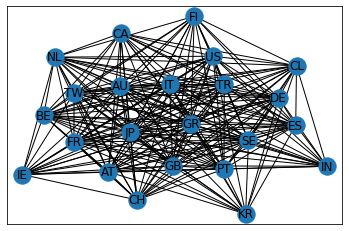

2005-06-30


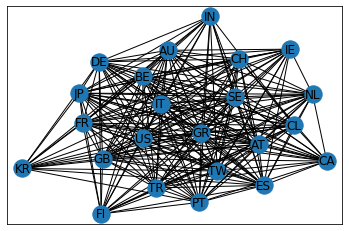

2005-09-30


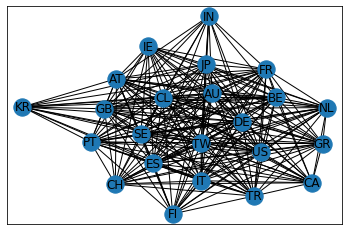

2005-12-31


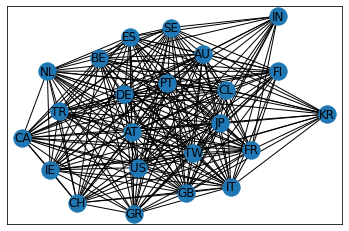

2006-03-31


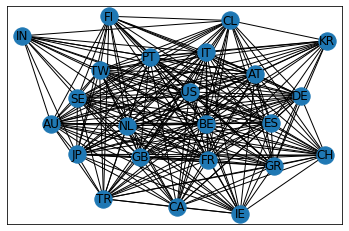

2006-06-30


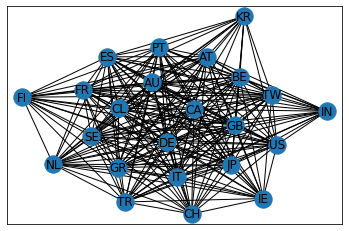

2006-09-30


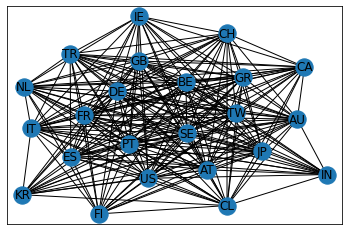

2006-12-31


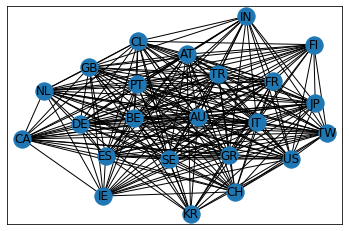

2007-03-31


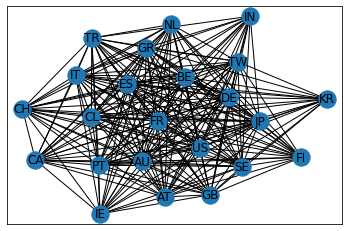

2007-06-30


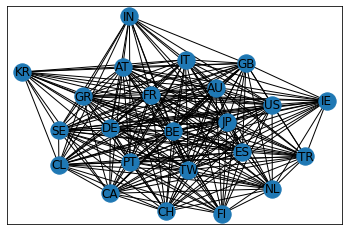

2007-09-30


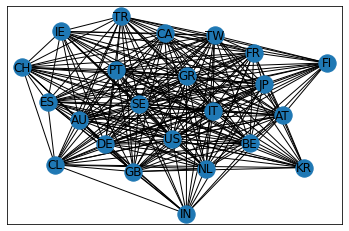

2007-12-31


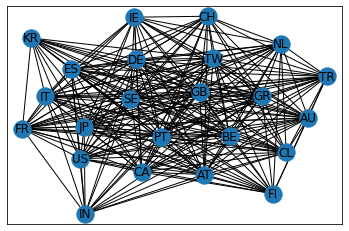

2008-03-31


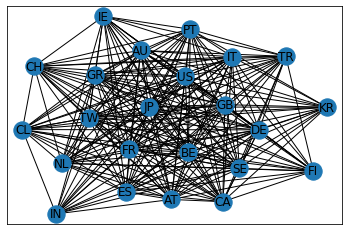

2008-06-30


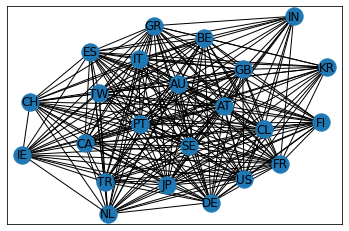

2008-09-30


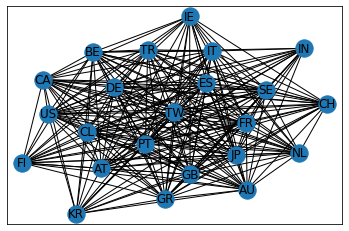

2008-12-31


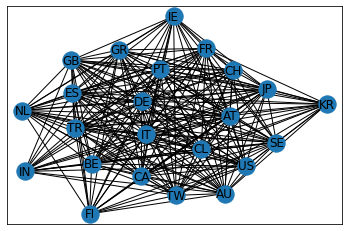

2009-03-31


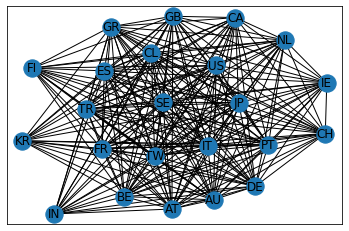

2009-06-30


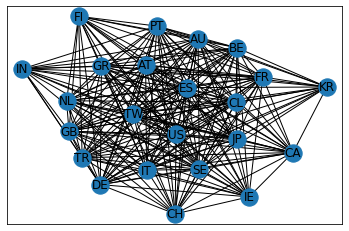

2009-09-30


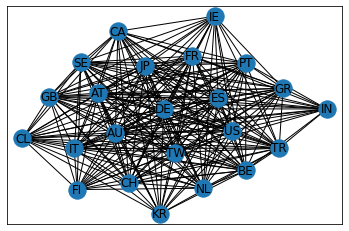

2009-12-31


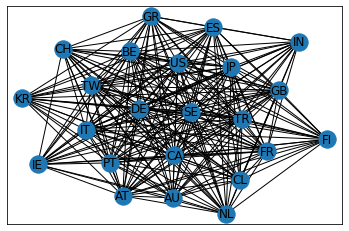

2010-03-31


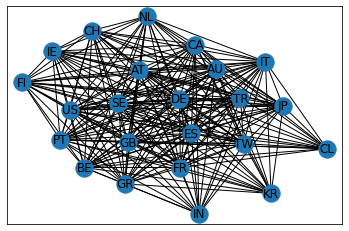

2010-06-30


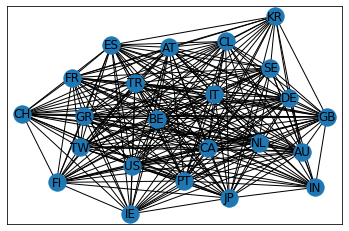

2010-09-30


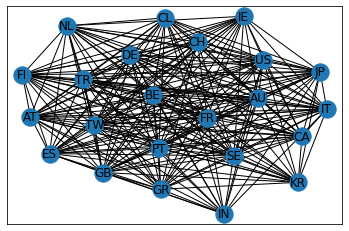

2010-12-31


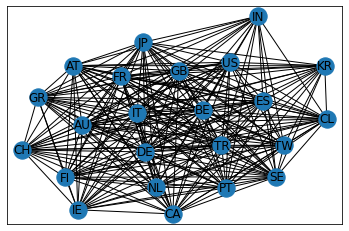

2011-03-31


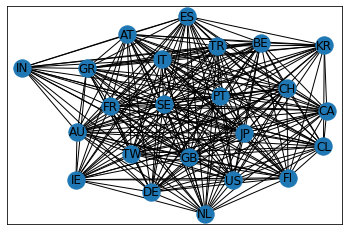

2011-06-30


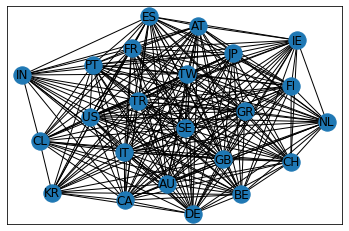

2011-09-30


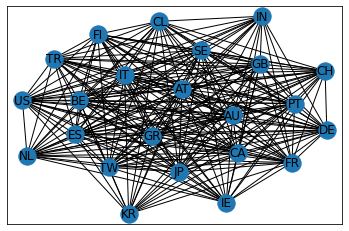

2011-12-31


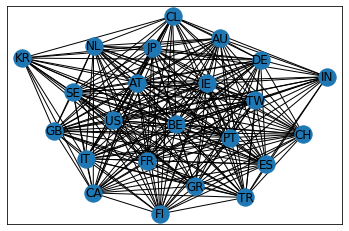

2012-03-31


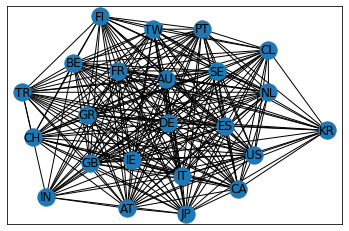

2012-06-30


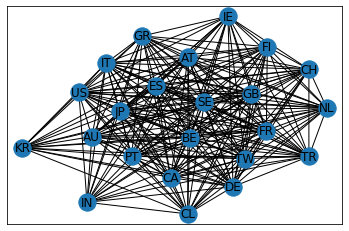

2012-09-30


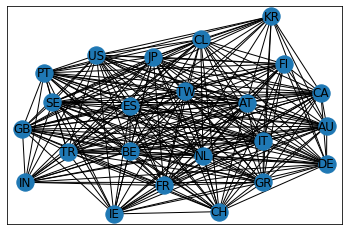

2012-12-31


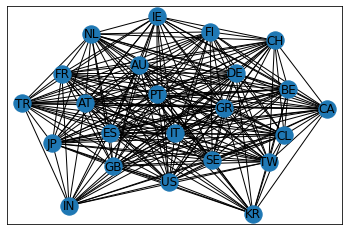

2013-03-31


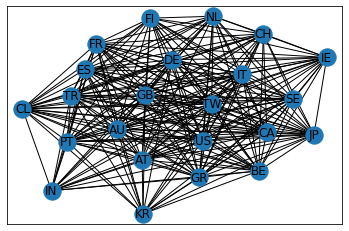

2013-06-30


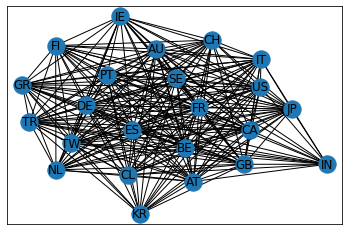

2013-09-30


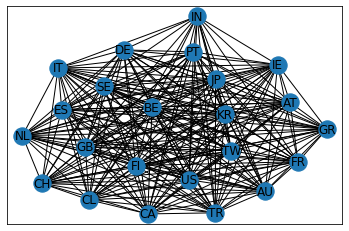

2013-12-31


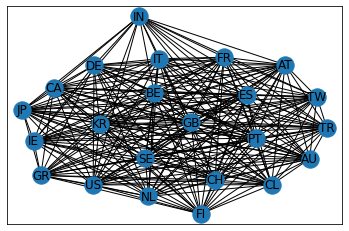

2014-03-31


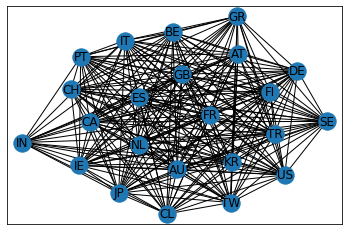

2014-06-30


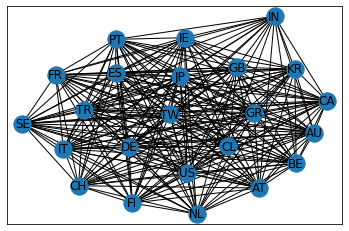

2014-09-30


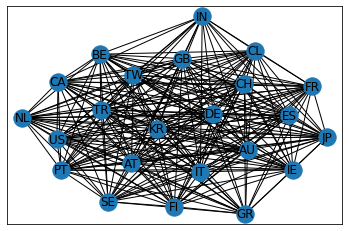

2014-12-31


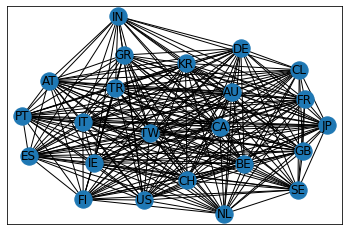

2015-03-31


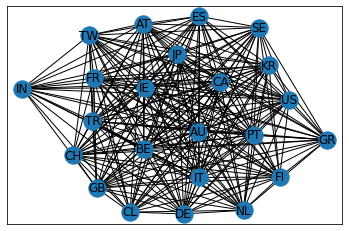

2015-06-30


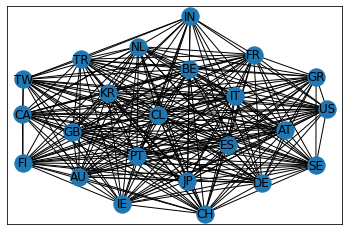

2015-09-30


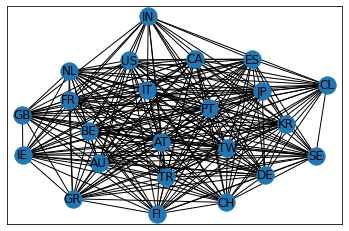

2015-12-31


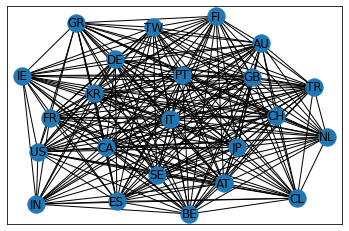

2016-03-31


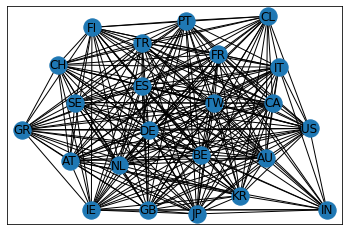

2016-06-30


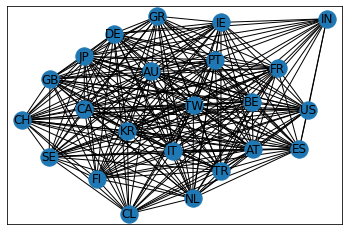

2016-09-30


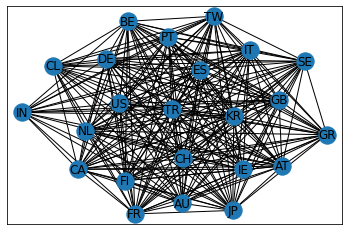

2016-12-31


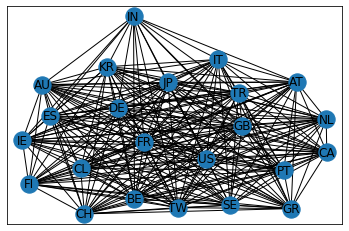

2017-03-31


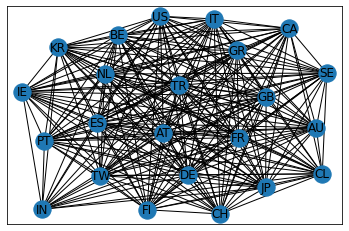

2017-06-30


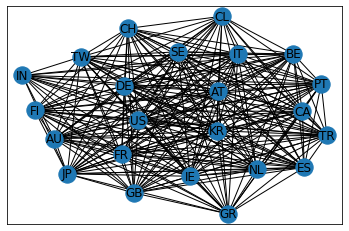

2017-09-30


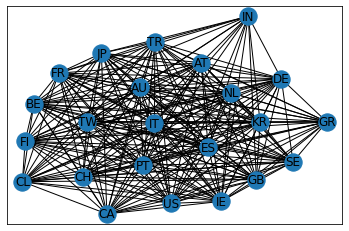

2017-12-31


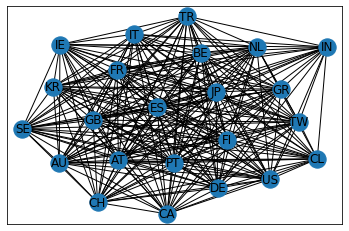

2018-03-31


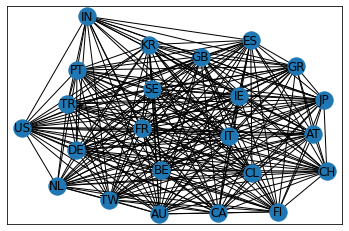

2018-06-30


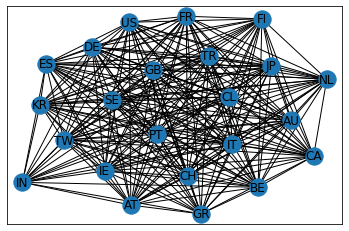

2018-09-30


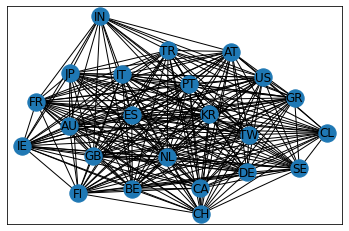

2018-12-31


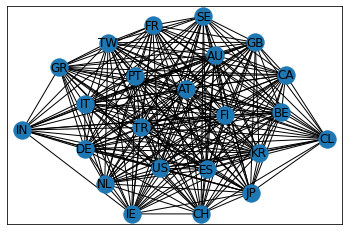

2019-03-31


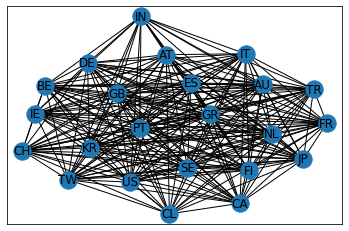

2019-06-30


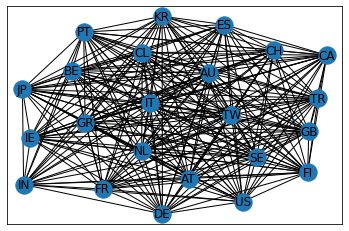

2019-09-30


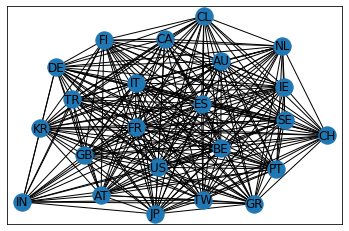

2019-12-31


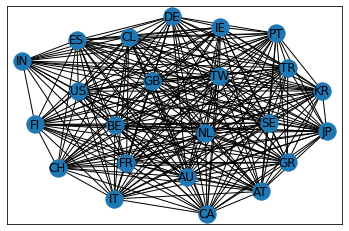

2020-03-31


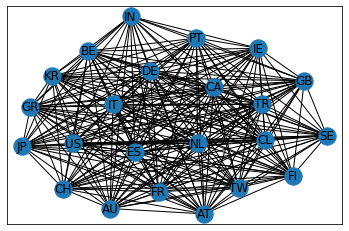

2020-06-30


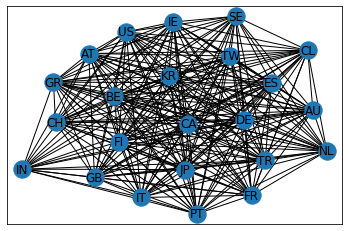

2020-09-30


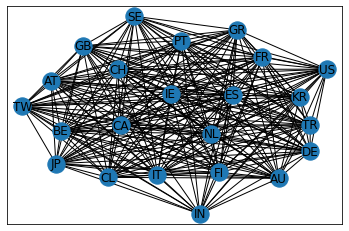

2020-12-31


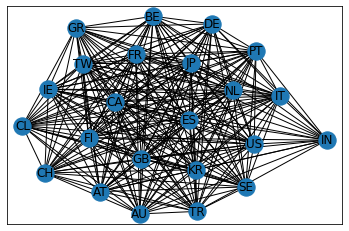

2021-03-31


In [440]:
quarters = list(edges['net_id'].unique())
for q in quarters:
    plt.figure()
    df = edges[edges['net_id'] == q]
    G = nx.convert_matrix.from_pandas_edgelist(df, 'from_id', 'to_id', 'value')
    nx.write_gml(G, f'./graphs/{q}')
    nx.draw_networkx(G)
    plt.show()
    print(q)

In [92]:
import numpy as np

def get_long_run_state(pi, k, P):
    return pi @ np.linalg.matrix_power(P, k)

def extract_Q(P):
    indices_without_1_in_diagonal = np.where(P.diagonal() != 1)[0]
    Q = P[indices_without_1_in_diagonal.reshape(-1,1), indices_without_1_in_diagonal]
    return Q

def compute_N(Q):
    number_of_rows, _ = Q.shape
    N = np.linalg.inv(np.eye(number_of_rows) - Q)
    return N

def compute_t(P):
    Q = extract_Q(P)
    N = compute_N(Q)
    number_of_rows, _ = Q.shape
    return N @ np.ones(number_of_rows)

In [513]:
country_list = list(edges['from_id'].unique())

def transform_to_transitional_matrix(df, p_default):
    df = df.drop('net_id',axis=1).pivot(index ='from_id', columns ='to_id')
    df.columns = df.columns.droplevel()
    
    # The adjacency matrix
    adjacency = pd.DataFrame(columns=country_list, index=country_list)
    for col in adjacency:
        if col in df.columns:
            adjacency.loc[:,col] = df[col]
    adjacency = adjacency.fillna(0)
    
    adjacency = adjacency.to_numpy()
    
    # Normalising the adjacency matrix for Markov processes, considering risk of default
    transition = (adjacency/adjacency.sum(axis=1, keepdims=True))*(1-p_default)
    transition = np.column_stack([transition, p_default])
    
    # The [0,0,...,1] row vector which ensures the absorption of the default state
    absorb = [0]*(transition.shape[0]+1)
    absorb[-1] = 1
    
    # Final transitional matrix with possibility of default
    transition = np.vstack([transition, absorb])

    return transition



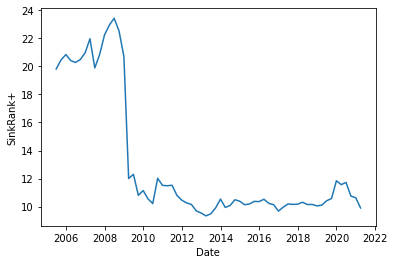

0
2005-06-30  19.815535
2005-09-30  20.460154
2005-12-31  20.847660
2006-03-31  20.419370
2006-06-30  20.281229
...               ...
2020-03-31  11.567244
2020-06-30  11.726866
2020-09-30  10.750775
2020-12-31  10.629792
2021-03-31   9.904395

[64 rows x 1 columns]

In [586]:
np.random.seed(100)
t = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,]

p = pd.DataFrame([np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,
              np.random.randint(1,2,size=64)/100,])

p2 = pd.DataFrame([[0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.01]*64,
              [0.5]*64,])


p2.index = country_list
p2.columns = quarters

l = []
for q in quarters:
    y1 = edges[edges['net_id'] == q]
    l.append(np.dot(compute_t(transform_to_transitional_matrix(y1, p2[q].to_numpy())),gdp_norm[q]))
    
p = pd.DataFrame(l)
p.index = quarters
p.index = pd.to_datetime(p.index)
plt.plot(p)
plt.xlabel('Date')
plt.ylabel('SinkRank+')
plt.savefig('usa.png')
plt.show()


p


In [429]:
index_map = {
    'AUS': 'AU',
    'AUT': 'AT',
    'BEL': 'BE',
    'CAN': 'CA',
    'CHE': 'CH',
    'CHL': 'CL',
    'DEU': 'DE',
    'ESP': 'ES',
    'FIN': 'FI',
    'FRA': 'FR',
    'GBR': 'GB',
    'GRC': 'GR',
    'IND': 'IN',
    'IRL': 'IE',
    'ITA': 'IT',
    'JPN': 'JP',
    'KOR': 'KR',
    'NLD': 'NL',
    'PRT': 'PT',
    'SWE': 'SE',
    'TUR': 'TR',
    'USA': 'US'
}

gdp = pd.read_csv('gdp.csv')
gdp = gdp[['LOCATION','TIME','Value']].pivot(index='LOCATION', columns='TIME').drop('OECD')
gdp.columns = gdp.columns.droplevel()
gdp.index = gdp.index.map(index_map)
gdp['2003-Q4'] = start
gdp = gdp.drop(['2003-Q3','2021-Q4'], axis=1)

for i, col in enumerate(gdp.iloc[:,1:]):
    gdp.iloc[:,i+1] = gdp.iloc[:,i]*(1+gdp.iloc[:,i+1]/100)
# gdp = gdp.transpose()
# gdp['TW'] = [317381, 346924,346924,346924,346924,374060,374060,374060,374060,386450,386450,386450,386450,406907,406907,406907,406907,415901,415901,415901,415901,390829,390829,390829,390829,444281,444281,444281,444281,483974,483974,483974,483974,495610,495610,495610,495610,512943,512943,512943,512943,535328,535328,535328,535328,534515,534515,534515,534515,543081,543081,543081,543081,590733,590733,590733,590733,609198,609198,609198,609198,612168,612168,612168,612168,668156,668156,668156,668156,785589,785589,785589]
# gdp = gdp.transpose()
gdp = gdp.drop(['2003-Q4', '2004-Q1', '2004-Q2', '2004-Q3', '2004-Q4', '2005-Q1', '2021-Q2', '2021-Q3'], axis=1)
gdp.columns = edges['net_id'].unique()

In [438]:
gdp_norm = (gdp/gdp.sum())